In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Data\delhi_aqi.csv')

In [20]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
data = df[pollutants]

In [21]:
correlation_matrix = data.corr(method='pearson')
print("Correlation Coefficient Matrix:\n", correlation_matrix)

Correlation Coefficient Matrix:
              co        no       no2        o3       so2     pm2_5      pm10  \
co     1.000000  0.914129  0.764201 -0.402284  0.534227  0.936830  0.950218   
no     0.914129  1.000000  0.557712 -0.354905  0.498719  0.816441  0.829910   
no2    0.764201  0.557712  1.000000 -0.343609  0.710371  0.701840  0.711998   
o3    -0.402284 -0.354905 -0.343609  1.000000  0.013204 -0.286661 -0.294825   
so2    0.534227  0.498719  0.710371  0.013204  1.000000  0.488476  0.491889   
pm2_5  0.936830  0.816441  0.701840 -0.286661  0.488476  1.000000  0.989291   
pm10   0.950218  0.829910  0.711998 -0.294825  0.491889  0.989291  1.000000   
nh3    0.784951  0.724342  0.718399 -0.275983  0.628444  0.644446  0.686081   

            nh3  
co     0.784951  
no     0.724342  
no2    0.718399  
o3    -0.275983  
so2    0.628444  
pm2_5  0.644446  
pm10   0.686081  
nh3    1.000000  


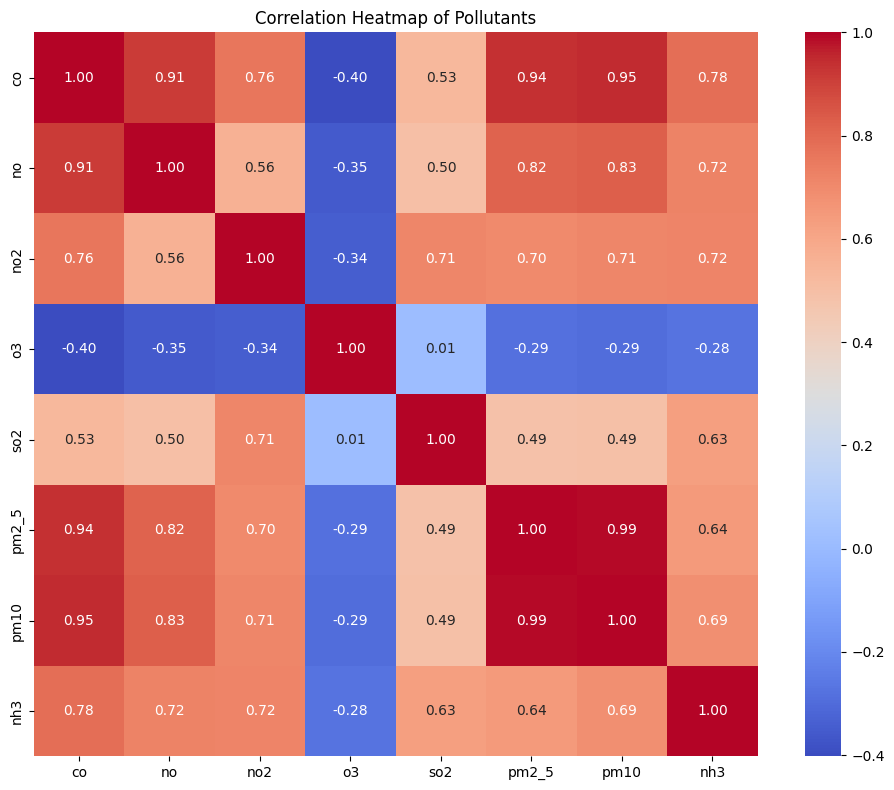

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.tight_layout()
plt.show()

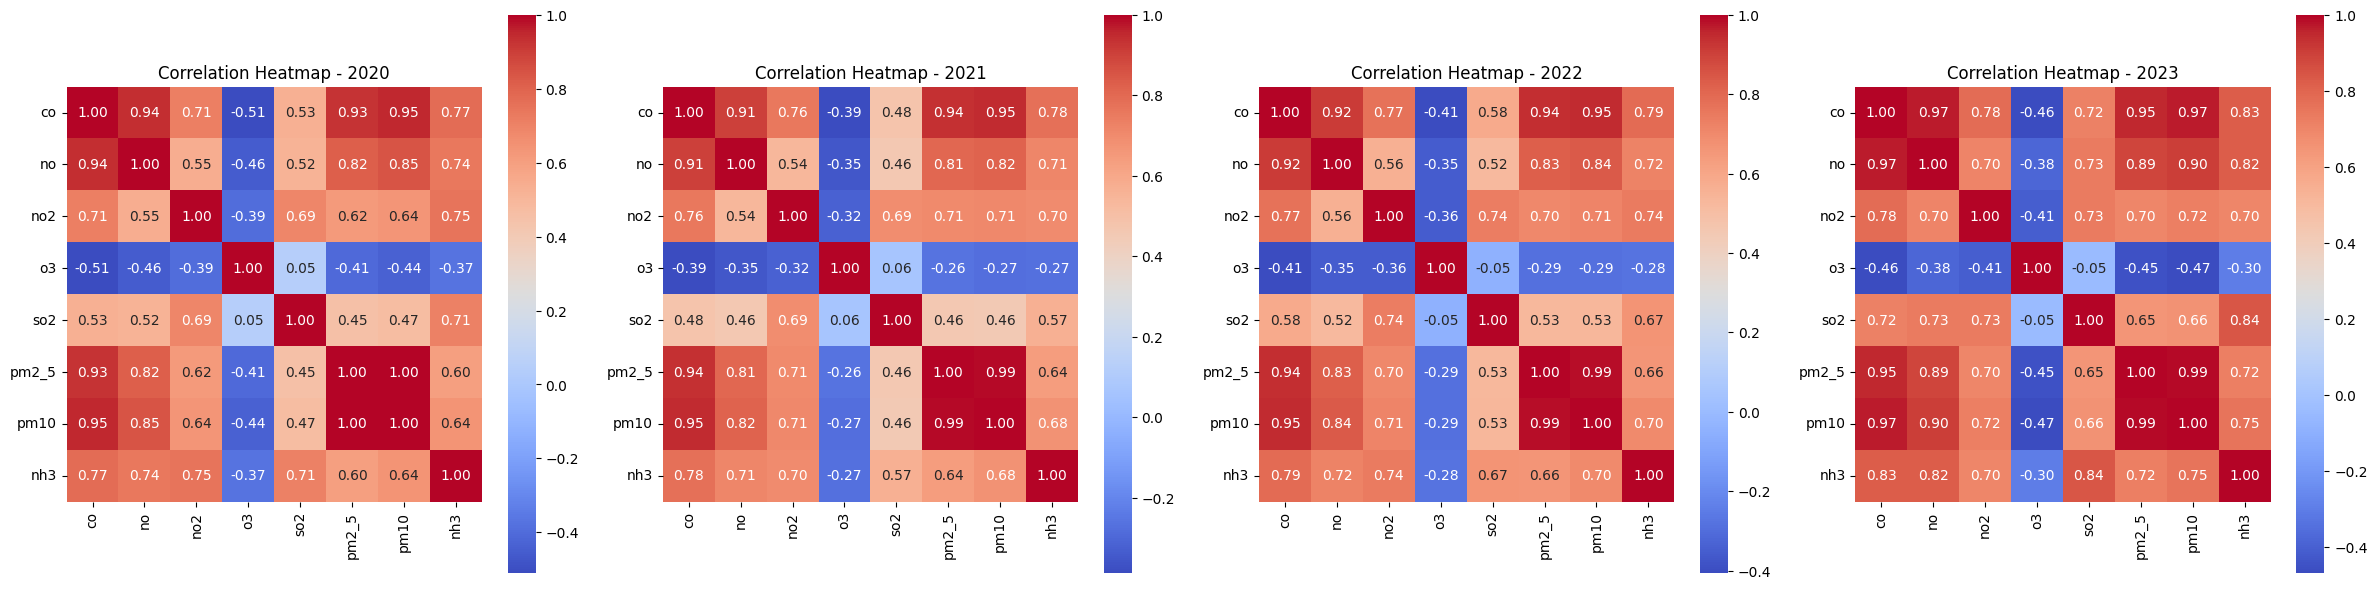

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Data/delhi_aqi.csv')

# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Define pollutant columns
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Get unique years
unique_years = sorted(df['year'].unique())

# Set up subplots
num_years = len(unique_years)
fig, axes = plt.subplots(1, num_years, figsize=(6 * num_years, 6))

# Ensure axes is iterable
if num_years == 1:
    axes = [axes]

# Plot heatmaps
for i, year in enumerate(unique_years):
    yearly_data = df[df['year'] == year][pollutants]
    corr_matrix = yearly_data.corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", ax=axes[i])
    axes[i].set_title(f"Correlation Heatmap - {year}")

plt.tight_layout()
plt.show()


In [28]:
data.drop('o3', inplace=True,axis=1)

In [33]:
data.drop('nh3', inplace=True,axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15524\4176878139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('nh3', inplace=True,axis=1)


In [31]:
data.head()

,co,no,no2,pm2_5,pm10,nh3
0,2616.88,2.18,70.60,364.61,411.73,28.63
1,3631.59,23.25,89.11,420.96,486.21,41.04
2,4539.49,52.75,100.08,463.68,541.95,49.14
3,4539.49,50.96,111.04,454.81,534.00,48.13
4,4379.27,42.92,117.90,448.14,529.19,46.61


In [38]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('Data/delhi_aqi.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Define pollutant columns
pollutants = ['co', 'no', 'no2', 'pm2_5', 'pm10', 'so2']
data = df[pollutants]

# Step 1: Compute correlation matrix
corr_matrix = data.corr().abs()

# Step 2: Get upper triangle of the correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Step 3: Find features with correlation > 0.9
threshold = 0.92
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Step 4: Remaining features after dropping highly correlated ones
selected_features = [col for col in pollutants if col not in to_drop]

# Output results
print("Highly correlated columns to drop:", to_drop)
print("Selected efficient features for prediction:", selected_features)



Highly correlated columns to drop: ['pm2_5', 'pm10']
Selected efficient features for prediction: ['co', 'no', 'no2', 'so2']
